# Intro

In [155]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Three dimensional data are often differentiated for being structured or unstructured, here an image from MayaVi docs


![title](https://docs.enthought.com/mayavi/mayavi/_images/dataset_diagram.jpg)

The starting point is always 3d points, they might represent vertices of a mesh or the points of a point cloud

# 1. points

In python a good way to represent a point is as a list of three coordinates in a rectangular frame of reference

In [156]:
p1 = [1.2, 4.6, 2.4]
print(p1)

[1.2, 4.6, 2.4]


When dealing with multiple points the best way is to use a list-of-lists:

In [157]:
points = [p1, [2.4,2.5,2.3], [5.4,2.3,2.1], [2.1,2.2,2.4]]
print(points)

[[1.2, 4.6, 2.4], [2.4, 2.5, 2.3], [5.4, 2.3, 2.1], [2.1, 2.2, 2.4]]


Lists are base types in python, so they are always available, but using numpy objects we can leverage better linear algebra operations,
it also gives better print abilities on large datasets


In [158]:
nppoints = np.array(points)
print(nppoints)

[[1.2 4.6 2.4]
 [2.4 2.5 2.3]
 [5.4 2.3 2.1]
 [2.1 2.2 2.4]]


How many points? we can just ask for the length of the array

In [159]:
npoints = len(points)
print(npoints)

4


Each point is stored as a row of a Nx3 matrix, this simplify indexing, so we can access the first point in our set of points:


In [160]:
p2 = nppoints[1]

Just remember that indexing in python starts from 0, while in matlab from 1. Might be a little confusing at the beginning but this make the language more similar to C-like languages


In [161]:
p1 = nppoints[0]
p3 = nppoints[2]

In [162]:
print(p1)
print(p2)
print(p3)

[1.2 4.6 2.4]
[2.4 2.5 2.3]
[5.4 2.3 2.1]


Each column represent a different coordinate $x,y,z$

In [163]:
x,y,z = nppoints.T

# plotting points

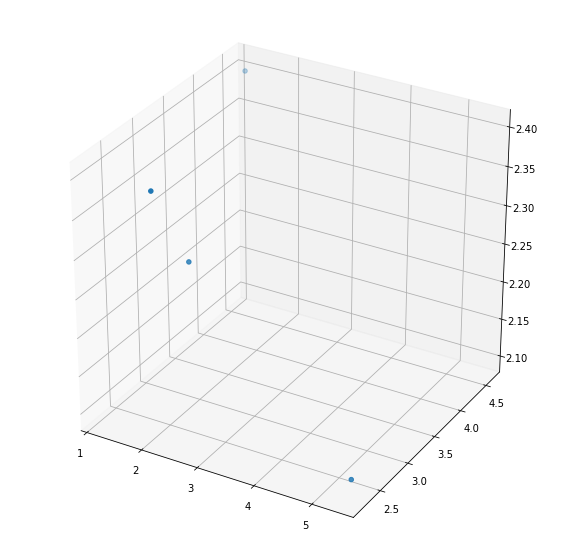

In [164]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

ax.scatter(x,y,z)

plt.show()

this often works fine for a small number of points, but not quite as well for point cloud data. We might prefer a way of exporting this data and get them into cloudcompare, for example

In [165]:
np.savetxt("point-set.txt", nppoints)

# Exercise, open up in cloudcompare and in paraview

In paraview the sequence is table -> points -> extract surface

Now try with a large number of points

In [166]:
newpoints = np.random.randn(1000,3)
print(newpoints)

[[-0.03992873  0.81283452  1.06645605]
 [-0.75282508  0.03179056 -0.10427587]
 [ 0.52253005 -0.52355467 -0.94533792]
 ...
 [ 0.688157    0.20284807  0.5182408 ]
 [ 0.07916984  1.19623605  0.47328255]
 [-0.28301309 -0.08312632 -1.23966383]]


In [167]:
np.savetxt("point-set.txt", newpoints)

Reload it in paraview, this ability makes very nice to work with experimental data that changes

# first exercise, we want to add "scalar fields" data

![title](https://docs.enthought.com/mayavi/mayavi/_images/dataset_diagram.jpg)

The scalar field must represent the distance of each point from a "center point":

$d_i =|| \vec {p}_i - \vec{c}_i||$

In [168]:
#first thing we define a center
c = np.array([0.2,0.1,0.0])

In [169]:
# now we need to compute the actual distances
# a simple but not efficient way is to use a for-loop, which is very easy in python:

points = nppoints 
points = newpoints

distances = [] # we will put the distances here
for p in points: # iterator works along the "row dimension", in this way p will be a new row (point) at each loop
    d= np.linalg.norm(p-c) # the norm of the difference
    distances.append(d) # here we add this element to the "distances" list

    
# transform this list into a numpy array, for easy of use
distances = np.array(distances)

In [170]:
# the same can be done in a one line:
distances2 = np.linalg.norm( points-c, axis = 1)

In [171]:
# we can verify it the two distances we computed matches
np.all(distances2 == distances)

True

# visualization of the field

A common way is to use a color-mapping

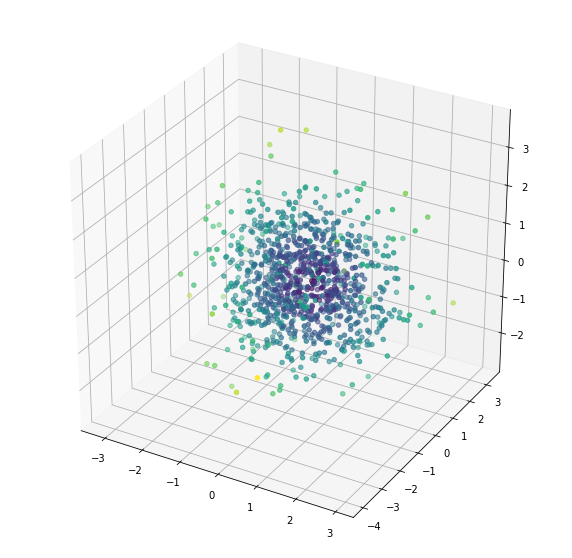

In [172]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

ax.scatter(*points.T, c=distances)
# ax.set_aspect('equal')

plt.show()

Paraview and cloudcompare are definitvely better suited for this, but we need to save the data

In [173]:
alldata = np.column_stack([points, distances])
np.savetxt("point-set.txt", alldata)

See what happens in paraview

# improving our output abilities, we can use pandas for example

In [174]:
import pandas
df = pandas.DataFrame(alldata, columns=["x","y","z", "distances"])
df.to_csv("df-points.csv")


In [175]:
df.to_excel("df-points.xls") #this might require additional python modules

# plotting with matplib

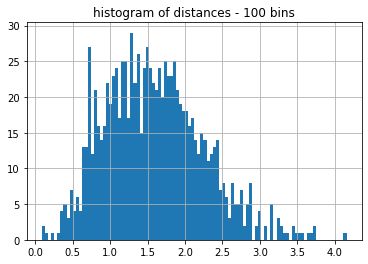

In [176]:
hist(df.distances, bins=100);

title("histogram of distances - 100 bins")

grid()

We can use as many fields as we want... let's add a field representing the distance from a plane:


$$d =d_0 - \vec p_i \cdot \hat n $$
$d$ is the distance of point $\vec p_i$ from the plane, which is defined by an unit normal $\hat n$ and a scalar $d_0$ which represent the distance of the plane from the origin
The plane itself is made of all the points $\vec p$ satisfying:
$$d_0 - \vec p_i \cdot \hat n =0$$

you can actually represent the plane in many different ways: https://en.wikipedia.org/wiki/Plane_(geometry). this one is called Hesse normal form

In [177]:
d0 = 1.0 # the plane will be 1 meter away from the origin [0,0,0]
n = np.random.randn(3) # a random orientation
n /= np.linalg.norm(n) # an unit normal

In [178]:
distances3 = []
for p in points:
    d = d0 - p.dot(n)
    distances3.append(d)
    
distances3 = np.array(distances3)

In [179]:
# add it to our dataframe
df["distances_plane"] = distances3

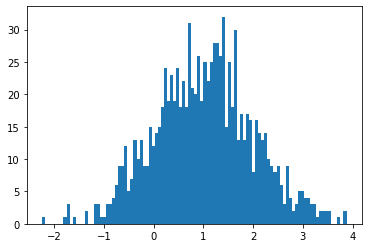

In [182]:
hist(df.distances_plane, bins=100);

In [183]:
df.to_csv("df-points.csv")